In [1]:
import numpy as np
import torch

import nn

import sys
sys.path.insert(0, '../01_code')
from simple_Hamiltonian_systems import HarmonicOscillator

# run on GPU if possible
print('GPU available:')
print(torch.cuda.is_available())

#dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dev = torch.device("cpu") # use CPU anyway because it is faster for FNN soft loss...

GPU available:
False


In [2]:
n = 10000 # training data
epochs = 6000

X_train, Y_train = nn.generate_training_data(n, device=dev)

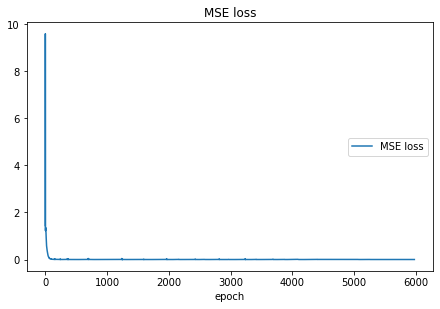

MSE loss
	MSE loss         	 (min:    0.000, max:    1.435, cur:    0.001)


In [3]:
# train FNN with MSE loss
model_mse = nn.train_fnn(X_train, Y_train, epochs=epochs, device=dev)

In [4]:
# train FNN with symplectic soft loss
#model_soft = nn.train_softfnn(X_train, Y_train, epochs=epochs, device=dev)

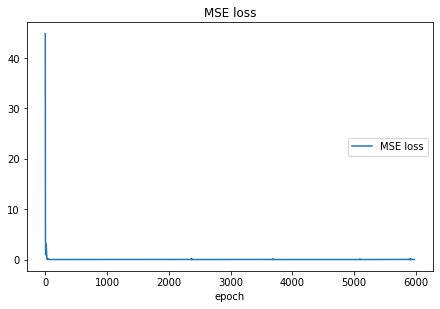

MSE loss
	MSE loss         	 (min:    0.000, max:   44.763, cur:    0.001)


In [5]:
# train SympNet
model_sympnet = nn.train_sympnet(X_train, Y_train, epochs=epochs, device=dev)

In [6]:
## Harmonic oscillator
model = HarmonicOscillator()
mu = {'m': 1., 'k': 1., 'f': 0., 'q0': 1., 'p0': 0.}

# compute solution for all t in [0, pi]
X_exact, _ = model.solve(0, np.pi, np.pi/1e3, mu)
X_mse_loss, _ = nn.integrate(model_mse, device=dev)
#X_soft_loss, _ = nn.integrate(model_soft, device=dev)
X_sympnet, _ = nn.integrate(model_sympnet, device=dev)

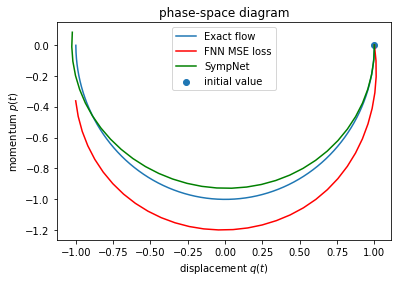

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

ax.plot(X_exact[0,:], X_exact[1,:], label='Exact flow')
ax.plot(X_mse_loss[:,0], X_mse_loss[:,1], 'r', label='FNN MSE loss')
#ax.plot(X_soft_loss[:,0], X_soft_loss[:,1], 'g', label='FNN soft loss')
ax.plot(X_sympnet[:,0], X_sympnet[:,1], 'g', label='SympNet')
ax.scatter(X_exact[0,0], X_exact[1,0], marker='o', label='initial value')
ax.set_xlabel(r'displacement $q(t)$')
ax.set_ylabel(r'momentum $p(t)$')
ax.legend()
ax.set_title('phase-space diagram')

fig.show()